<a href="https://colab.research.google.com/github/brnnwon/Miniproject/blob/main/Student%20Perfomance/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance

ข้อมูลผลการเรียนของนักเรียนใน 3 วิชา เลข (Math) การอ่าน (Reading) และ การเขียน (Writing) ทุกวิชาคะแนนเต็มร้อย

### Data Description

| Variable | Definition |
| -------- | ---------- |
| gender | male, female |
| race/ethinicity | race/ethinicity group (A, B, C, D, E) |
| parental level of education | Parent's education level <br> (some high school, high school, some college, associate's degree, bachelor's degree, master degree) |
| lunch | lunch program in high school (free/reduced, standard) |
| test preparation course | Whether the student took a the test preparation course (none, completed) |
| math score | exam score for Math subject |
| reading score | exam score for reading subject |
| writing score | exam score for writing subject |

**Variable Note**

parental level of education เรียงจากต่ำไปสูงคือ
1. some high school
2. high school
3. some college
4. associate's degree
5. bachelor's degree
6. master degree

### Objective:
**ให้สร้าง model ทำนายผลคะแนนเฉลี่ย และตอบคำถามต่อไปนี้**

- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาเลขไหม?
- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการอ่านไหม?
- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการเขียนไหม?
- ปัจจัย 3 ลำดับแรกที่ส่งผลต่อคะแนนเฉลี่ยของนักเรียน?

In [ ]:
#import necsesary model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('students_performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.389000,69.269000,68.154000
std,16.223714,15.143909,15.469182
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,229.000000,200.000000,160.000000


In [ ]:
df['mean_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean_score                     0
dtype: int64

In [ ]:
test_prep = df.groupby('test preparation course')[['writing score', 'math score', 'reading score', 'mean_score']].mean()

<AxesSubplot:xlabel='test preparation course'>

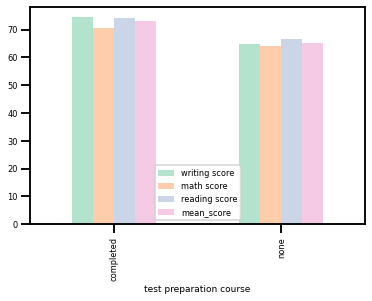

In [ ]:
df.groupby('test preparation course')[['writing score', 'math score', 'reading score', 'mean_score']].mean().plot(kind='bar')

Test preparation course มีผลต่อผลคะแนนในรายวิชาต่างๆ

Data Visualization

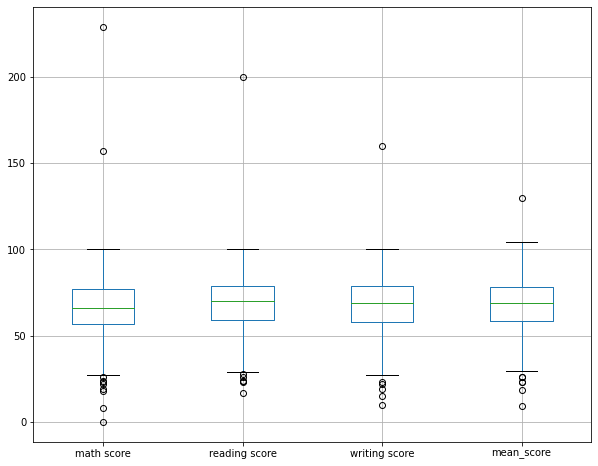

In [ ]:
df.boxplot(column= ['math score', 'reading score', 'writing score', 'mean_score'], figsize=(10,8))
plt.show()

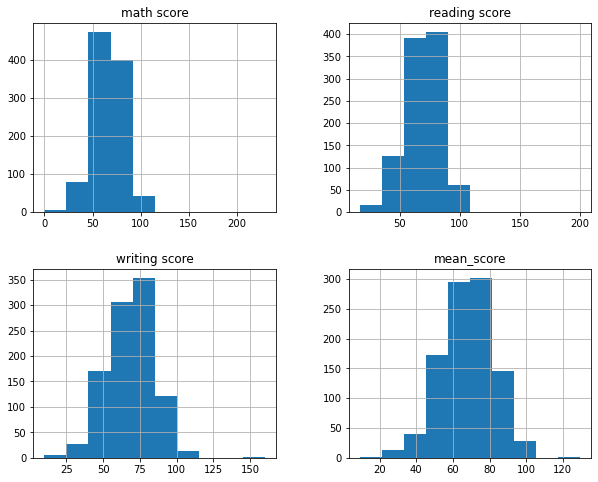

In [ ]:
df.hist(column= ['math score', 'reading score', 'writing score', 'mean_score'], figsize=(10,8))
plt.show()

In [ ]:
# for col in ['math score', 'reading score', 'writing score', 'mean_score']:
#     sns.displot(df[col])
#     plt.show()

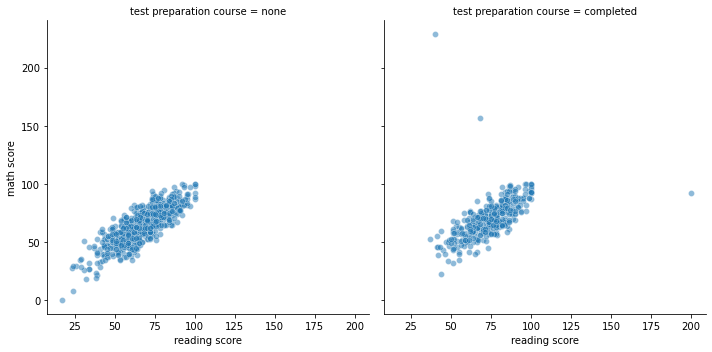

In [ ]:
sns.relplot(data=df, x = 'reading score', y = 'math score', col = 'test preparation course', kind='scatter', alpha = 0.5)
plt.show()

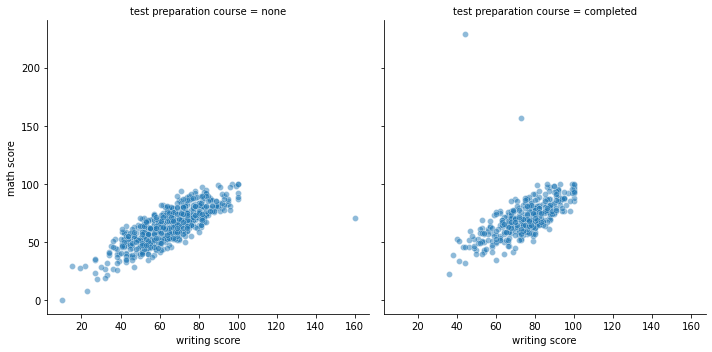

In [ ]:
sns.relplot(data=df, x = 'writing score', y = 'math score', col = 'test preparation course', kind='scatter', alpha = 0.5)
plt.show()

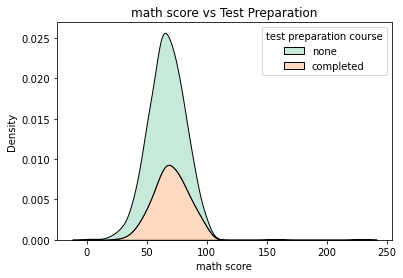

In [ ]:
# sns.set_context("talk",font_scale=0.5)
sns.set_palette("Pastel2")
sns.kdeplot(data=df, x="math score", hue="test preparation course", multiple="stack")
plt.title('math score vs Test Preparation')

plt.show()

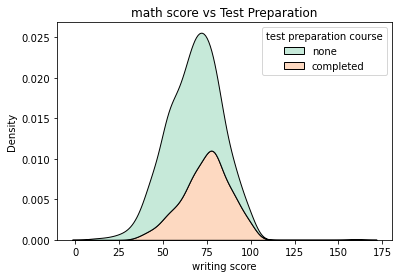

In [ ]:
sns.set_palette("Pastel2")
sns.kdeplot(data=df, x="writing score", hue="test preparation course", multiple="stack")
plt.title('math score vs Test Preparation')

plt.show()

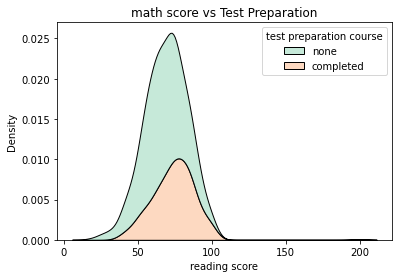

In [ ]:
sns.set_palette("Pastel2")
sns.kdeplot(data=df, x="reading score", hue="test preparation course", multiple="stack")
plt.title('math score vs Test Preparation')

plt.show()

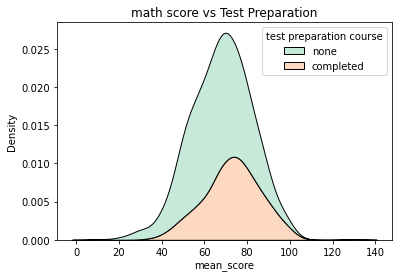

In [ ]:
sns.set_palette("Pastel2")
sns.kdeplot(data=df, x="mean_score", hue="test preparation course", multiple="stack")
plt.title('math score vs Test Preparation')

plt.show()

In [ ]:
df[['math score', 'reading score', 'writing score', 'mean_score']].corr()

,math score,reading score,writing score,mean_score
math score,1.000000,0.722885,0.721528,0.884560
reading score,0.722885,1.000000,0.915023,0.946726
writing score,0.721528,0.915023,1.000000,0.946856
mean_score,0.884560,0.946726,0.946856,1.000000


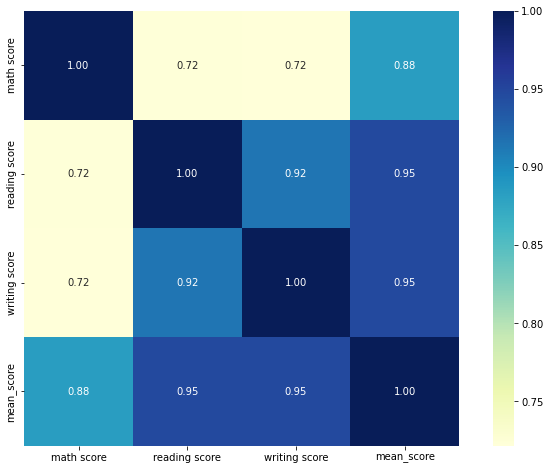

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df[['math score', 'reading score', 'writing score', 'mean_score']].corr(), square = True, annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.show()

Preprocessing

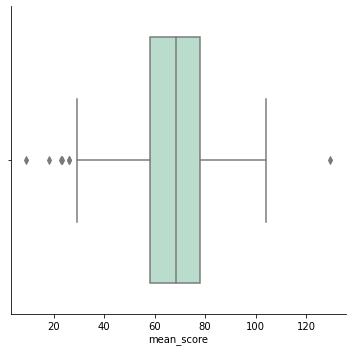

In [ ]:
#Remove outlier
sns.catplot(data = df, x = 'mean_score', kind='box')
plt.show()

In [ ]:
cal_Q1 = df["mean_score"].quantile(0.25)
cal_Q3 = df["mean_score"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

19.666666666666664

In [ ]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 28.83333333333334 upper: 107.5


In [ ]:
df = df[(df['mean_score'] > lower_limit) & (df['mean_score'] < upper_limit)]
df.shape

(993, 9)

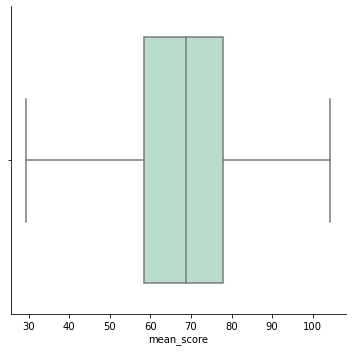

In [ ]:
sns.catplot(data = df, x = 'mean_score', kind='box')
plt.show()

Manipulating with categorical data

In [ ]:
#Display data wihtin the categorical features
cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in cols:
    print(df[col].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [ ]:
#Categorical to Numerical
df['gender'] = df['gender'].apply(lambda x : 1 if x == 'male' else 0)
df['lunch'] = df['lunch'].apply(lambda x : 1 if x == 'standard' else 0)
df['test preparation course'] = df['test preparation course'].apply(lambda x : 1 if x == 'completed' else 0)

In [ ]:
#Ordinal data
scale_map = {"some high school" : 0, "high school" : 1, "some college" : 2, "associate's degree" : 3, "bachelor's degree" : 4, "master's degree" : 5}
df['parental level of education'] = df['parental level of education'].replace(scale_map)


In [ ]:
#One hot enconding for race/ethnicity
onehot_column = pd.get_dummies(df'race/ethnicity', prefix=['race/ethnicity'])
df = pd.concat([df, onehot_column], axis = 1)
df.drop(columns='race/ethnicity', axis=1, inplace=True)

In [ ]:
#drop score feature
df.drop(['math score', 'reading score', 'writing score'], axis=1, inplace=True)

In [ ]:
df.head()

,gender,parental level of education,lunch,test preparation course,mean_score,['race/ethnicity']_group A,['race/ethnicity']_group B,['race/ethnicity']_group C,['race/ethnicity']_group D,['race/ethnicity']_group E
0,0,4,1,0,72.666667,0,1,0,0,0
1,0,2,1,1,82.333333,0,0,1,0,0
2,0,5,1,0,92.666667,0,1,0,0,0
3,0,3,0,0,49.333333,1,0,0,0,0
4,0,2,1,0,76.333333,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       993 non-null    int64  
 1   parental level of education  993 non-null    int64  
 2   lunch                        993 non-null    int64  
 3   test preparation course      993 non-null    int64  
 4   mean_score                   993 non-null    float64
 5   ['race/ethnicity']_group A   993 non-null    uint8  
 6   ['race/ethnicity']_group B   993 non-null    uint8  
 7   ['race/ethnicity']_group C   993 non-null    uint8  
 8   ['race/ethnicity']_group D   993 non-null    uint8  
 9   ['race/ethnicity']_group E   993 non-null    uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 83.7 KB


In [ ]:
df.describe()

,gender,parental level of education,lunch,test preparation course,mean_score,['race/ethnicity']_group A,['race/ethnicity']_group B,['race/ethnicity']_group C,['race/ethnicity']_group D,['race/ethnicity']_group E
count,993.0,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,0.0,2.091641,0.647533,0.359517,68.159114,0.087613,0.188318,0.320242,0.263847,0.139980
std,0.0,1.458658,0.477979,0.480101,13.880618,0.282874,0.391163,0.466804,0.440939,0.347141
min,0.0,0.000000,0.000000,0.000000,29.333333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,0.000000,0.000000,58.333333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,2.000000,1.000000,0.000000,68.666667,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,3.000000,1.000000,1.000000,78.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.0,5.000000,1.000000,1.000000,104.333333,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(993, 10)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Overview variances from feature
df.var()

gender                           0.000000
parental level of education      2.127682
lunch                            0.228464
test preparation course          0.230497
mean_score                     192.671566
['race/ethnicity']_group A       0.080018
['race/ethnicity']_group B       0.153009
['race/ethnicity']_group C       0.217906
['race/ethnicity']_group D       0.194428
['race/ethnicity']_group E       0.120507
dtype: float64

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_scaled.var()

gender                         0.000000
parental level of education    1.001008
lunch                          1.001008
test preparation course        1.001008
mean_score                     1.001008
['race/ethnicity']_group A     1.001008
['race/ethnicity']_group B     1.001008
['race/ethnicity']_group C     1.001008
['race/ethnicity']_group D     1.001008
['race/ethnicity']_group E     1.001008
dtype: float64

Evaluation models

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score   
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Spliting data

In [ ]:
X = df_scaled.drop(columns='mean_score', axis=1)
y = df_scaled['mean_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(695, 9)
(298, 9)
(695,)


Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

0.20974456557000276

In [ ]:
mean_squared_error(y_test, y_pred_lr)

0.7887102350402885

In [ ]:
#RSME
rsme_lr = mean_squared_error(y_test, y_pred_lr)**(1/2)
rsme_lr

0.8880935958784347

Lasso

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
lasso.score(X_test, y_test)

0.1474101438646419

In [ ]:
mean_squared_error(y_test, y_pred_lasso)

0.850922773230294

In [ ]:
rsme_lasso = mean_squared_error(y_test, y_pred_lasso)**(1/2)
rsme_lasso

0.9224547540287783

In [ ]:
lasso.coef_

array([ 0.        ,  0.08802334,  0.19179722,  0.14645451, -0.        ,
       -0.        , -0.        ,  0.        ,  0.01780893])

Decision Tree

In [ ]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
dt.score(X_train, y_train)

0.23817093022707392

In [ ]:
dt.score(X_test, y_test)

0.13837337685209172

In [ ]:
mean_squared_error(y_test, y_pred_dt)

0.8599418705043463

In [ ]:
rsme_dt = mean_squared_error(y_test, y_pred_dt)**(1/2)
rsme_dt

0.9273305076963371

In [ ]:
dt.feature_importances_

array([0.        , 0.26313191, 0.35783982, 0.25242751, 0.03705292,
       0.030023  , 0.03285902, 0.00592272, 0.0207431 ])

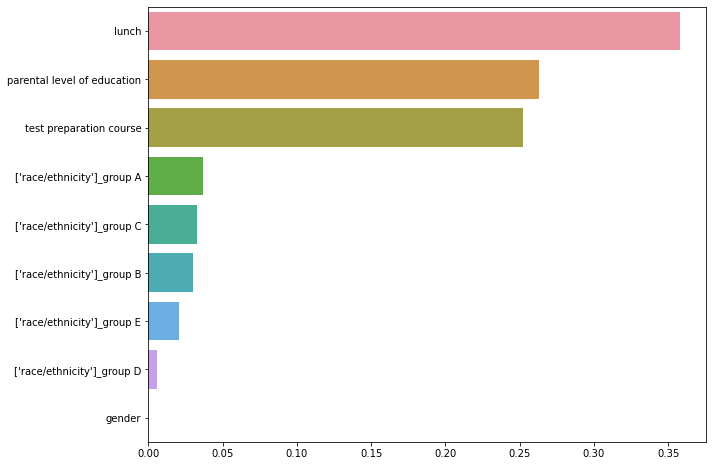

In [ ]:
plt.figure(figsize = (10,8))
dt_importance = pd.Series(dt.feature_importances_,index=X.columns)
dt_importance = dt_importance.sort_values(ascending = False)
sns.barplot(x=dt_importance, y=dt_importance.index)
plt.show()